<a href="https://colab.research.google.com/github/JunsooJung/Python25Study/blob/main/04_02_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

생선 럭키백

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from scipy.special import expit
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish["Species"].value_counts()

,count
Species,
Perch,56
Bream,35
Roach,20
Pike,17
Smelt,14
Parkki,11
Whitefish,6


In [ ]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
print(train_input.shape, test_input.shape)

(119, 5) (40, 5)


In [ ]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)
print(train_scaled[:5])

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


In [ ]:
kn = KNeighborsClassifier(n_neighbors=3)    # 이웃 3개 참고
kn.fit(train_scaled, train_target)          # 훈련시작

print(kn.score(train_scaled, train_target)) # 훈련점수 89.07%
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


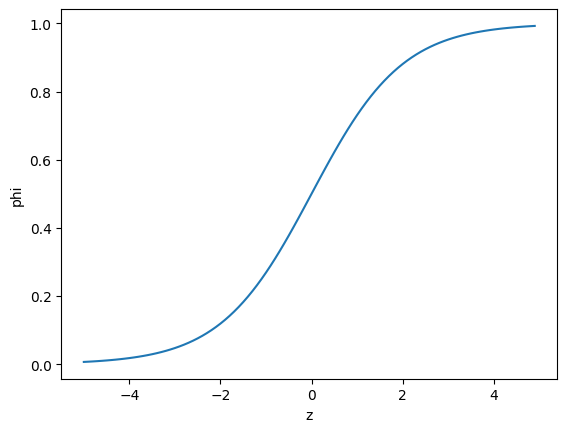

In [ ]:
z = np.arange(-5, 5, 0.1) # -5~5까지 0.1 간격으로 배열 생성
phi = 1 / (1 + np.exp(-z)) # np.exp() 함수로 시그모이드공식 암기

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

In [ ]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]
# 손쉽게 도미와 빙어 데이터만 골라낼 수 있다.
print(train_bream_smelt)    # 도미이거나 빙어의 특성리스트


[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [ ]:
lr = LogisticRegression()   # 로지스틱 회귀 객체를 변수에 연결
lr.fit(train_bream_smelt, target_bream_smelt)
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


In [ ]:
print(lr.coef_, lr.intercept_)

decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)
print(expit(decisions)) # phi = 1 / (1 + np.exp(-z))

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]
[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]
[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)  # max_iter=1000 정확도를 위해서 1000번 반복
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target)) # 93.27%
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [ ]:
decision = lr.decision_function(test_scaled[:5])
print("5개 샘플에 대한 z1 ~ z7의 값\n")
for idx,z in enumerate(decision): # 선형방정식를 이용한 7개의 특성의 값
    print(f"{idx}번째 샘플의 z값\n{z}\n")

5개 샘플에 대한 z1 ~ z7의 값

0번째 샘플의 z값
[-6.50722813  1.03902666  5.16819138 -2.75730346  3.33655201  0.34625858
 -0.62549703]

1번째 샘플의 z값
[-10.87900747   1.9441061    4.77600606  -2.42306183   2.98748716
   7.84171376  -4.24724379]

2번째 샘플의 z값
[-4.33809957 -6.23690282  3.16746648  6.48091391  2.36412675  2.43431897
 -3.87182372]

3번째 샘플의 z값
[-0.69143993  0.44628533  2.64291146 -1.21457286  3.2612452  -5.70143405
  1.25700485]

4번째 샘플의 z값
[-6.40138611 -1.99137623  5.81526372 -0.134644    3.49905133 -0.08753486
 -0.69937385]



In [ ]:

from scipy.special import softmax           # 소프트맥스를 사용하여 7개를 100%로 분류
print("소프트맥스 함수로 예측 확률 구하기\n")
class_ = lr.classes_.tolist() + ["예측 결과"]
prd = lr.predict(test_scaled[:5]).reshape(5,-1)
sm = softmax(decision, axis=1).round(2) * 100
con = np.column_stack((sm,prd))
print(pd.DataFrame(con,columns=class_))

소프트맥스 함수로 예측 확률 구하기

  Bream Parkki Perch  Pike Roach Smelt Whitefish  예측 결과
0   0.0    1.0  84.0   0.0  13.0   1.0       0.0  Perch
1   0.0    0.0   4.0   0.0   1.0  95.0       0.0  Smelt
2   0.0    0.0   3.0  93.0   2.0   2.0       0.0   Pike
3   1.0    3.0  31.0   1.0  57.0   0.0       8.0  Roach
4   0.0    0.0  90.0   0.0   9.0   0.0       0.0  Perch
